#### Edge Detection

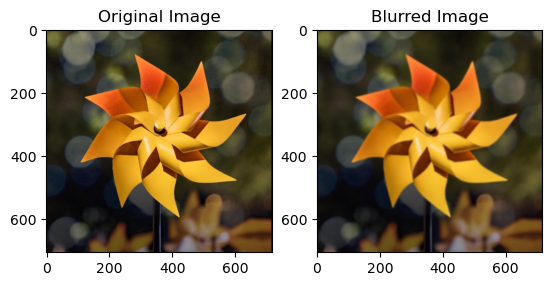

In [1]:
import cv2
import matplotlib.pyplot as plt

# Read the input image
image = cv2.imread('/home/pratyush/Downloads/edge.jpg')

# Apply Gaussian blur
blurred = cv2.GaussianBlur(image, (11, 11), 0)  # You can adjust the kernel size (e.g., (5, 5)) as needed

# Convert BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)

# Display the original and blurred images
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(blurred_rgb), plt.title('Blurred Image')

plt.show()



#### Using Kmeans

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

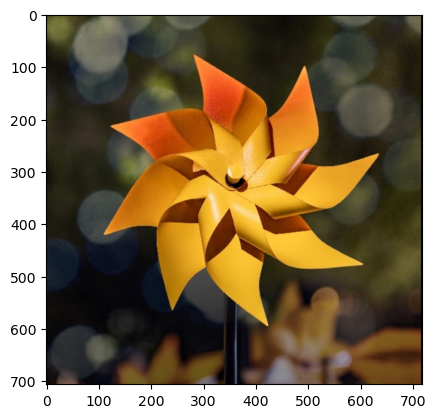

In [3]:
image = cv2.imread('/home/pratyush/Downloads/edge.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [4]:
X = image.reshape(-1,3)

In [5]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

/home/pratyush/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [6]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img =segmented_img/255

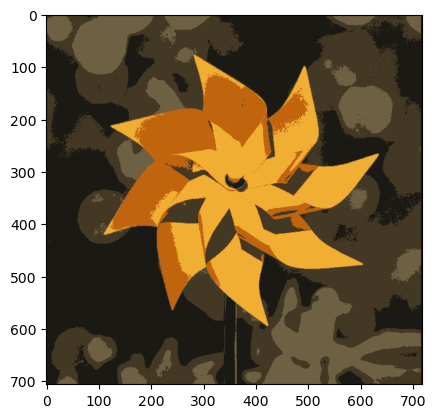

In [7]:
plt.imshow(segmented_img)

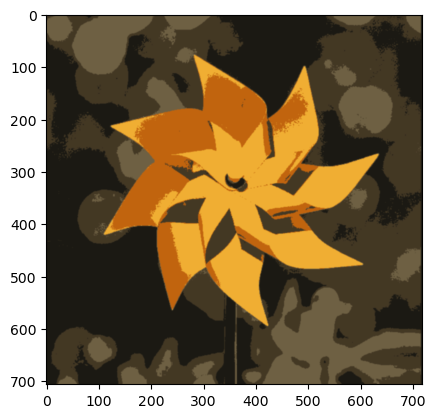

In [8]:
blurred = cv2.GaussianBlur(segmented_img, (3, 3), 0) 
plt.imshow(blurred)

In [9]:
blurred.shape

(706, 717, 3)

In [10]:
# Convert to grayscale
gray = cv2.cvtColor((blurred * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)

# # Apply Otsu's thresholding
_, segmented = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
edges = cv2.Canny(segmented, 150, 200)

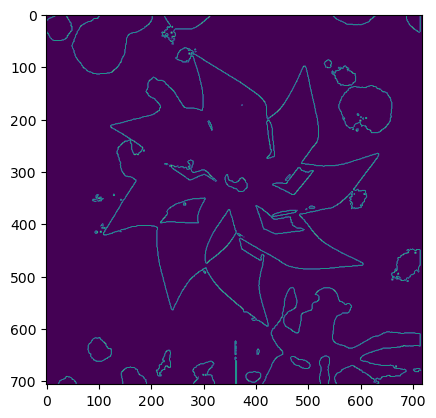

In [11]:
plt.imshow(edges)

#### using adaptive thresholding

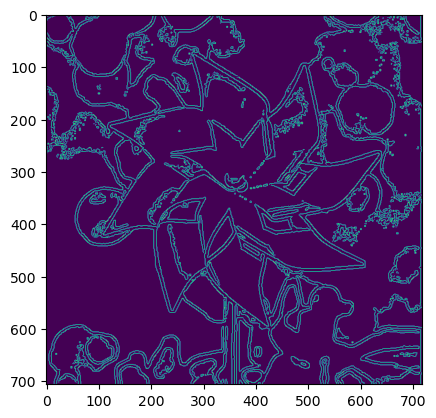

In [12]:
segmented = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)
edges = cv2.Canny(segmented, 10, 50)
plt.imshow(edges)

#### Using HSV colourspace

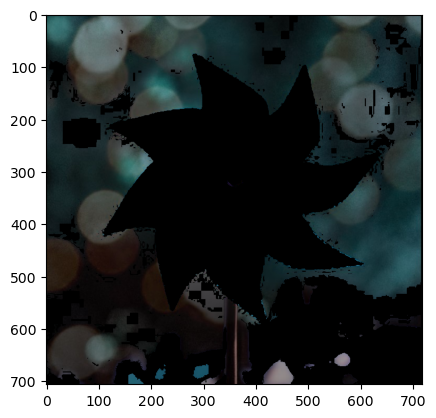

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/home/pratyush/Downloads/edge.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_yellow = np.array([22, 0, 0])
upper_yellow = np.array([184, 255, 180])

mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
result = cv2.bitwise_and(image, image, mask=mask)
result = cv2.bitwise_and(image, result, mask=mask)

plt.imshow(result)


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/home/pratyush/Downloads/edge.jpg')

# Convert BGR to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for yellow
lower_yellow = np.array([22, 0, 0])
upper_yellow = np.array([184, 255, 180])

# Create a mask
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# # Set non-yellow pixels to black in the original image
# result = image.copy()
# result[np.where(mask == 0)] = 0

# # Bitwise AND between the original image and the result
# final_image = cv2.bitwise_and(image, result)

# # Display the original, result, and final images
# plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 3, 2)
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.title('Separated Yellow Region')
# plt.axis('off')

# plt.subplot(1, 3, 3)
# plt.imshow(mask)
# plt.title('Final Image (Bitwise AND)')
# plt.axis('off')

# plt.show()


(-0.5, 716.5, 705.5, -0.5)

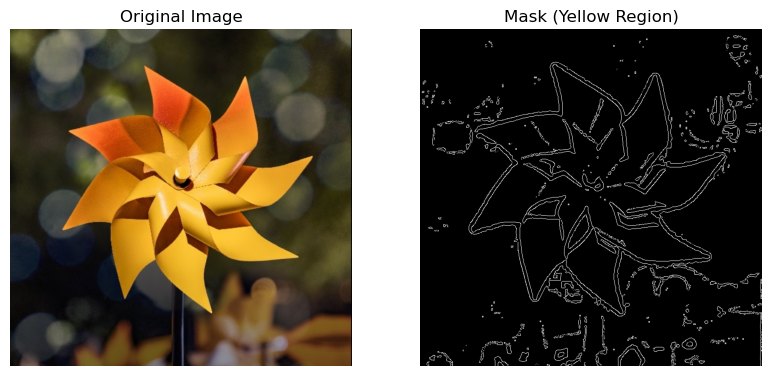

In [76]:
# Create a blank image of the same size as the original image
blank_image = np.zeros_like(image)

# Set the mask region to the desired value in the blank image
blank_image[np.where(mask != 0)] = (255, 255, 255)  
# Create the complement of the mask
inverse_mask = cv2.bitwise_not(blank_image)

# Bitwise AND between the original image and the complement of the mask
blurred_result = cv2.GaussianBlur(result_image, (17, 17), 0)
# Convert the blurred result to grayscale
gray_blurred = cv2.cvtColor(blurred_result, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Canny edge detection to the thresholded image
edges = cv2.Canny(adaptive_thresh, 50, 200)
# Display the original image, mask, and the resulting image with the mask
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges,cmap='gray')
plt.title('Mask (Yellow Region)')
plt.axis('off')

In [47]:
inverse_mask.shape

(706, 717, 3)

In [7]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a window
cv2.namedWindow('Image with HSV Range')

# Create trackbars for HSV range
cv2.createTrackbar('Hue Lower', 'Image with HSV Range', 0, 180, nothing)
cv2.createTrackbar('Hue Upper', 'Image with HSV Range', 180, 180, nothing)
cv2.createTrackbar('Saturation Lower', 'Image with HSV Range', 0, 255, nothing)
cv2.createTrackbar('Saturation Upper', 'Image with HSV Range', 255, 255, nothing)
cv2.createTrackbar('Value Lower', 'Image with HSV Range', 0, 255, nothing)
cv2.createTrackbar('Value Upper', 'Image with HSV Range', 255, 255, nothing)

# Load an example image
image = cv2.imread('')  # Replace 'your_image.jpg' with your image file

while True:
    # Get trackbar positions
    hue_lower = cv2.getTrackbarPos('Hue Lower', 'Image with HSV Range')
    hue_upper = cv2.getTrackbarPos('Hue Upper', 'Image with HSV Range')
    sat_lower = cv2.getTrackbarPos('Saturation Lower', 'Image with HSV Range')
    sat_upper = cv2.getTrackbarPos('Saturation Upper', 'Image with HSV Range')
    val_lower = cv2.getTrackbarPos('Value Lower', 'Image with HSV Range')
    val_upper = cv2.getTrackbarPos('Value Upper', 'Image with HSV Range')

    # Convert the image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create a mask using the HSV range
    lower_bound = np.array([hue_lower, sat_lower, val_lower])
    upper_bound = np.array([hue_upper, sat_upper, val_upper])
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Apply the mask to the original image
    result_image = cv2.bitwise_and(image, image, mask=mask)

    # Display the image with the HSV range
    cv2.imshow('Image with HSV Range', np.hstack([image, result_image]))

    # Exit the loop when the 'Esc' key is pressed
    if cv2.waitKey(1) == 27:
        break

# Print the final lower and upper values
print("Final HSV Lower Bound:", (hue_lower, sat_lower, val_lower))
print("Final HSV Upper Bound:", (hue_upper, sat_upper, val_upper))

cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread (0x2a7e5b0).
Cannot move to target thread (0x36a4110)

QObject::moveToThread: Current thread (0x36a4110) is not the object's thread

Final HSV Lower Bound: (4, 103, 0)
Final HSV Upper Bound: (22, 255, 255)


### Morphological Operations

Morphological operations are a set of image processing operations used in computer vision and image analysis to manipulate the structure of an image. These operations are based on the shape or morphology of features in the image. In OpenCV, a popular computer vision library, morphological operations are implemented through functions that operate on binary or grayscale images.

#### List of operations available

Erosion:
Erosion is a morphological operation that "erodes" the boundaries of the foreground (object) in an image.
It works by sliding a structuring element (a small matrix or kernel) over the image and replacing the pixel at the center of the structuring element with the minimum pixel value within the neighborhood defined by the structuring element.
Erosion is useful for removing small, unwanted details from an image and for shrinking the boundaries of objects.

Dilation:
Dilation is the opposite of erosion. It "expands" the boundaries of the foreground in an image.
Similar to erosion, it involves sliding a structuring element over the image, but instead of taking the minimum pixel value, it takes the maximum pixel value within the neighborhood defined by the structuring element.
Dilation is useful for filling in gaps, connecting broken parts of an object, and making objects more visible.

Opening:
Opening is a morphological operation that is a combination of erosion followed by dilation.
It is useful for removing noise and small objects from an image while preserving the larger structures.
Opening is particularly effective in separating objects that are close to each other.

Closing:
Closing is a morphological operation that is a combination of dilation followed by erosion.
It is useful for closing small holes in objects and smoothing the boundaries of objects.
Closing can also be effective in connecting objects that are slightly separated.

Morphological Gradient:
The morphological gradient is the difference between the dilation and erosion of an image.
It highlights the boundaries of objects and is useful for edge detection.

Top Hat and Black Hat:
Top Hat is the difference between the input image and its opening.
Black Hat is the difference between the closing of the input image and the input image.
These operations are useful for highlighting bright regions in an image (Top Hat) or dark regions (Black Hat).


#### Eroision

In [ ]:
import cv2
import numpy as np

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Downloads/mo.png', 0)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply erosion
erosion_result = cv2.erode(img, kernel, iterations=1)

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Erosion Result
plt.subplot(1, 2, 2)
plt.imshow(erosion_result, cmap='gray')
plt.title('Erosion Result')
plt.axis('off')

#### Dilation

In [ ]:
import cv2
import numpy as np

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Downloads/mo.png', 0)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Apply dilation
dilation_result = cv2.dilate(img, kernel, iterations=1)

# Plot the original and dilated images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dilation Result
plt.subplot(1, 2, 2)
plt.imshow(dilation_result, cmap='gray')
plt.title('Dilation Result')
plt.axis('off')

plt.show()

#### Opening

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Pictures/morph.png')

# Define a kernel (structuring element)
kernel = np.ones((11, 11), np.uint8)

# Apply opening (erosion followed by dilation)
opening_result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Plot the original and opened images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Opening Result
plt.subplot(1, 2, 2)
plt.imshow(opening_result, cmap='gray')
plt.title('Opening Result')
plt.axis('off')

plt.show()


#### Closing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Pictures/morph2.png')

# Define a kernel (structuring element)
kernel = np.ones((11, 11), np.uint8)

# Apply closing (dilation followed by erosion)
closing_result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# Plot the original and closed images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Closing Result
plt.subplot(1, 2, 2)
plt.imshow(closing_result, cmap='gray')
plt.title('Closing Result')
plt.axis('off')

plt.show()


#### Morphology Gradient

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Downloads/mo.png', 0)

# Define a kernel (structuring element)
kernel = np.ones((5, 5), np.uint8)

# Compute the morphology gradient
gradient_result = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

# Plot the original and gradient images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Morphology Gradient Result
plt.subplot(1, 2, 2)
plt.imshow(gradient_result, cmap='gray')
plt.title('Morphology Gradient Result')
plt.axis('off')

plt.show()


#### Top hat

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Downloads/th.jpg', 0)

# Define a kernel (structuring element)
kernel = np.ones((7, 7), np.uint8)

# Compute the top hat
top_hat_result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Plot the original and top hat images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Top Hat Result
plt.subplot(1, 2, 2)
plt.imshow(top_hat_result, cmap='gray')
plt.title('Top Hat Result')
plt.axis('off')

plt.show()


#### Black Hat

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in grayscale
img = cv2.imread('/home/pratyush/Pictures/bh.png', 0)

# Define a kernel (structuring element)
kernel = np.ones((15, 15), np.uint8)

# Compute the top hat
top_hat_result = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

# Plot the original and top hat images using matplotlib
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Top Hat Result
plt.subplot(1, 2, 2)
plt.imshow(top_hat_result, cmap='gray')
plt.title('Top Hat Result')
plt.axis('off')

plt.show()
